In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
sy.init_printing()
#defining joint angles
theta1, theta2, theta3, theta4, theta5, theta6,beta = sy.symbols('theta1 theta2 theta3 theta4 theta5 theta6 beta')
#defining DH parameters
a,alpha,theta,d,t = sy.symbols('a alpha theta d t')
#transformation matrix from frame i to i-1
R = sy.Matrix([[sy.cos(theta), -sy.sin(theta)*sy.cos(alpha), sy.sin(theta)*sy.sin(alpha)],
                 [sy.sin(theta), sy.cos(theta)*sy.cos(alpha), -sy.cos(theta)*sy.sin(alpha)],
                 [0, sy.sin(alpha), sy.cos(alpha)]])

P = sy.Matrix([a*sy.cos(theta),a*sy.sin(theta),d])

last_row = sy.Matrix([[0, 0, 0, 1]])
#homogeneous transformation matrix
A = sy.Matrix.vstack(sy.Matrix.hstack(R, P), last_row)

In [2]:
#compute transformations of every link
def link_transform(A,a_in,d_in,theta_in,alpha_in):
    T = A.subs({a:a_in, d:d_in, theta:theta_in, alpha:alpha_in})
    return T

# Forward Kinematics

In [3]:
A_01 = link_transform(A,0,0.0892,theta1,sy.pi/2)
A_12 = link_transform(A,-0.425,0,theta2,0)
A_23 = link_transform(A,-0.392,0,theta3,0)
A_34 = link_transform(A,0,0.1093,theta4,sy.pi/2)
A_45 = link_transform(A,0,0.09465,theta5,-sy.pi/2)
A_56 = link_transform(A,0,0.0825,theta6,0)

#transformation of every link w.r.t base frame
T_01 = A_01
T_02 = A_01*A_12
T_03 = A_01*A_12*A_23
T_04 = A_01*A_12*A_23*A_34
T_05 = A_01*A_12*A_23*A_34*A_45
#End-effector position
T_06 = sy.simplify(A_01*A_12*A_23*A_34*A_45*A_56)
print('T_06: ')
T_06

T_06: 


⎡(sin(θ₁)⋅sin(θ₅) + cos(θ₁)⋅cos(θ₅)⋅cos(θ₂ + θ₃ + θ₄))⋅cos(θ₆) - sin(θ₆)⋅sin(θ
⎢                                                                             
⎢(sin(θ₁)⋅cos(θ₅)⋅cos(θ₂ + θ₃ + θ₄) - sin(θ₅)⋅cos(θ₁))⋅cos(θ₆) - sin(θ₁)⋅sin(θ
⎢                                                                             
⎢                  sin(θ₆)⋅cos(θ₂ + θ₃ + θ₄) + sin(θ₂ + θ₃ + θ₄)⋅cos(θ₅)⋅cos(θ
⎢                                                                             
⎣                                                0                            

₂ + θ₃ + θ₄)⋅cos(θ₁)  -(sin(θ₁)⋅sin(θ₅) + cos(θ₁)⋅cos(θ₅)⋅cos(θ₂ + θ₃ + θ₄))⋅s
                                                                              
₆)⋅sin(θ₂ + θ₃ + θ₄)  (-sin(θ₁)⋅cos(θ₅)⋅cos(θ₂ + θ₃ + θ₄) + sin(θ₅)⋅cos(θ₁))⋅s
                                                                              
₆)                                      -sin(θ₆)⋅sin(θ₂ + θ₃ + θ₄)⋅cos(θ₅) + c
                                                   

In [4]:
thet_init = sy.Matrix([[0],[0],[0],[0],[0],[0]])
T_06_home = T_06.subs({theta1:thet_init[0], theta2:thet_init[1], theta3:thet_init[2],
                 theta4:thet_init[3],theta5:thet_init[4],theta6:thet_init[5]})
print('T_06(home config): ')
T_06_home

T_06(home config): 


⎡1  0  0    -0.817 ⎤
⎢                  ⎥
⎢0  0  -1  -0.1918 ⎥
⎢                  ⎥
⎢0  1  0   -0.00545⎥
⎢                  ⎥
⎣0  0  0      1    ⎦

# Inverse Kinematics

In [5]:
#end effector position w.r.t base frame
P_EE = T_06.col(3)
P_EE.row_del(3)
x = P_EE[0]
y = P_EE[1]
z = P_EE[2]

# J_param = J.subs({dp1:dp_1,dp2:dp_2,dp3:dp_3,dp4:dp_4,dp5:dp_5,dp6:dp_6,
#             z1:z_01,z2:z_02,z3:z_03,z4:z_04,z5:z_05,z6:z_06})
J = sy.Matrix([[sy.diff(T_06[0,3],theta1),sy.diff(T_06[0,3],theta2),sy.diff(T_06[0,3],theta3),sy.diff(T_06[0,3],theta4),sy.diff(T_06[0,3],theta5),sy.diff(T_06[0,3],theta6)],
               [sy.diff(T_06[1,3],theta1),sy.diff(T_06[1,3],theta2),sy.diff(T_06[1,3],theta3),sy.diff(T_06[1,3],theta4),sy.diff(T_06[1,3],theta5),sy.diff(T_06[1,3],theta6)],
               [sy.diff(T_06[2,3],theta1),sy.diff(T_06[2,3],theta2),sy.diff(T_06[2,3],theta3),sy.diff(T_06[2,3],theta4),sy.diff(T_06[2,3],theta5),sy.diff(T_06[2,3],theta6)],
               [T_01[0,2],T_02[0,2],T_03[0,2],T_04[0,2],T_05[0,2],T_06[0,2]],
               [T_01[1,2],T_02[1,2],T_03[1,2],T_04[1,2],T_05[1,2],T_06[1,2]],
               [T_01[2,2],T_02[2,2],T_03[2,2],T_04[2,2],T_05[2,2],T_06[2,2]]])
# print('Jacobian(parametric):')


In [6]:
thet_init = sy.Matrix([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
J_init = J.subs({theta1:thet_init[0], theta2:thet_init[1], theta3:thet_init[2],
                 theta4:thet_init[3],theta5:thet_init[4],theta6:thet_init[5]}).evalf()
print('Jacobian : ')
J_init

Jacobian : 


⎡0.1918  0.09465  0.09465  0.09465  -0.0825   0  ⎤
⎢                                                ⎥
⎢-0.817     0        0        0        0      0  ⎥
⎢                                                ⎥
⎢  0     -0.817   -0.392      0        0      0  ⎥
⎢                                                ⎥
⎢  0        0        0        0        0      0  ⎥
⎢                                                ⎥
⎢ -1.0    -1.0     -1.0       0      -1.0    -1.0⎥
⎢                                                ⎥
⎣  0        0        0      -1.0       0      0  ⎦

# Workspace Visualization

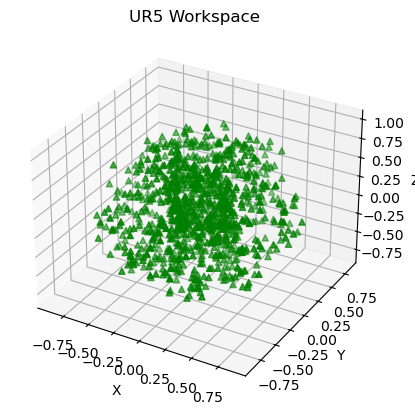

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import math 


l = []
for k in range(1000):
  A_01 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(0), d: 0.089159, a: 0})
  A_12 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(90), d: 0, a: 0})
  A_23 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(0), d: 0, a: -0.42500})
  A_34 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(0), d: 0.10915, a: -0.39225})
  A_45 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(-90), d: 0.09465, a: 0})
  A_56 = A.subs({theta: math.radians(random.randint(-180,180)), alpha: math.radians(90), d: 0.0823, a: 0})

  T_06 = A_01*A_12*A_23*A_34*A_45*A_56
  
  l.append(T_06)

x_pts = []
y_pts = []
z_pts = []

#For loop to obtain the final 3D plot for workspace
for i in range(1000):
  t = l[i]
  x_pts.append(t[0,3])
  y_pts.append(t[1,3])
  z_pts.append(t[2,3])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_arr = np.array(x_pts,dtype=np.float32)
y_arr = np.array(y_pts,dtype=np.float32)
z_arr = np.array(z_pts,dtype=np.float32)

ax.scatter3D(x_arr,y_arr,z_arr,c='green',marker='^')
# ax.set_animated(True)
ax.set_title('UR5 Workspace')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()